
# Intro to Linear Regression (scikit-learn)

Welcome! This notebook walks through a simple end‑to‑end example of linear regression using scikit‑learn.
You'll generate a tiny synthetic dataset, fit a model, visualize the fitted line, and compute common evaluation metrics.



## Learning goals

By the end of this mini‑lab, you should be able to:
- Explain the idea of linear regression (fit a line \( y = w x + b \)).
- Train a `LinearRegression` model with scikit‑learn.
- Visualize the fitted line against data.
- Interpret coefficients and intercept.
- Evaluate with Mean Squared Error (MSE) and \(R^2\).


In [2]:

# Setup: imports
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# For pretty prints
np.set_printoptions(precision=3, suppress=True)



## 1) Create a simple dataset

We'll synthesize data from a noisy straight line:
\[ y = 3.5x + 7 + \epsilon, \quad \epsilon \sim \mathcal{N}(0, 3) \]


In [3]:

# Reproducibility
rng = np.random.default_rng(42)

# Features (x) and target (y)
X = rng.uniform(0, 10, 100)              # 100 x-values between 0 and 10
noise = rng.normal(0, 3, size=100)       # Gaussian noise
y = 3.5 * X + 7 + noise                  # Linear relationship + noise

# scikit-learn expects 2D X: shape (n_samples, n_features)
X = X.reshape(-1, 1)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (100, 1)
y shape: (100,)



### Quick look at the data


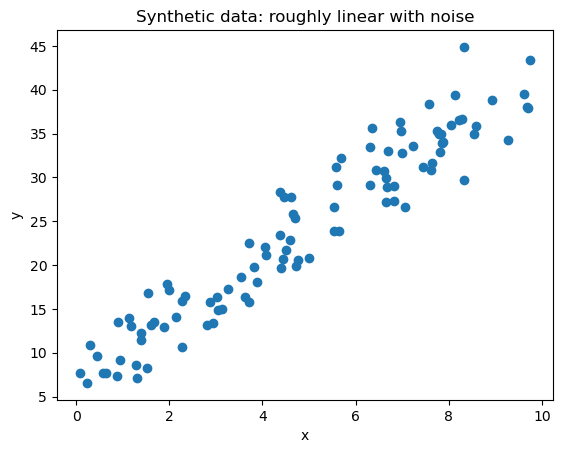

In [4]:

plt.figure()
plt.scatter(X, y)
plt.title("Synthetic data: roughly linear with noise")
plt.xlabel("x")
plt.ylabel("y")
plt.show()



## 2) Split the data into train and test sets

We'll train the model on the training set and use the held‑out test set to evaluate generalization.


Train size: 80  Test size: 20


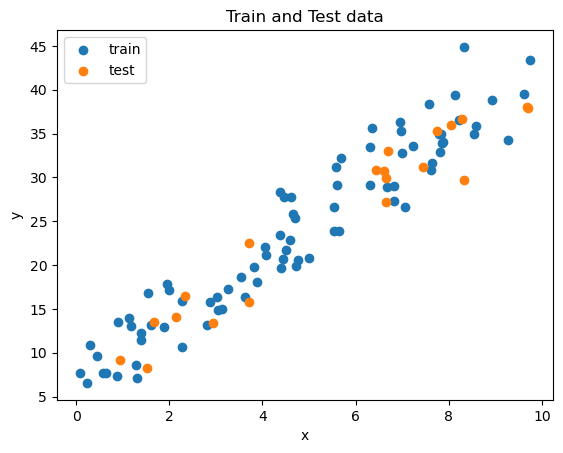

In [12]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape[0], " Test size:", X_test.shape[0])

plt.scatter(X_train, y_train, label="train")
plt.scatter(X_test, y_test, label="test")
plt.title("Train and Test data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()



## 3) Fit a linear regression model


In [10]:

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print("Coefficient (w):", linreg.coef_[0])
print("Intercept (b):", linreg.intercept_)


Coefficient (w): 3.5739212494694734
Intercept (b): 6.846561759670443



### Visualize the fitted line

We'll plot the training points and the model's predictions for a smooth range of x values.


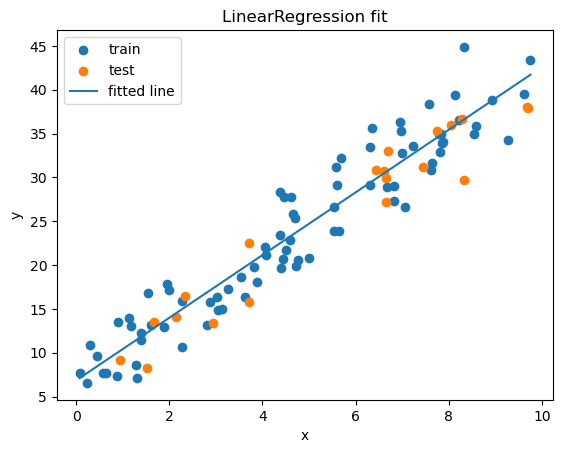

In [13]:

# Make a smooth set of x-values for the fitted line
x_line = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_line = linreg.predict(x_line)

plt.figure()
plt.scatter(X_train, y_train, label="train")
plt.scatter(X_test, y_test, label="test")
plt.plot(x_line, y_line, label="fitted line")
plt.title("LinearRegression fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()



## 4) Evaluate the model

We'll compute Mean Squared Error (MSE) and the Coefficient of Determination (\(R^2\)).


In [14]:

y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"MSE (train): {mse_train:.3f}")
print(f"MSE (test):  {mse_test:.3f}")
print(f"R^2 (train): {r2_train:.3f}")
print(f"R^2 (test):  {r2_test:.3f}")


MSE (train): 8.956
MSE (test):  7.729
R^2 (train): 0.911
R^2 (test):  0.922



## 5) Use the model to make predictions


In [15]:

# Try predicting for new x values
new_x = np.array([[0.0], [2.0], [5.0], [10.0]])
preds = linreg.predict(new_x)
for xi, yi in zip(new_x.ravel(), preds):
    print(f"x = {xi:>4.1f}  ->  predicted y = {yi:>7.3f}")


x =  0.0  ->  predicted y =   6.847
x =  2.0  ->  predicted y =  13.994
x =  5.0  ->  predicted y =  24.716
x = 10.0  ->  predicted y =  42.586



## Summary

- Linear regression finds parameters \( w \) and \( b \) that minimize squared error.
- In scikit‑learn, `LinearRegression().fit(X, y)` does the heavy lifting.
- Evaluate with metrics like MSE and \(R^2\), and always check performance on held‑out data.
